# STANFORD DATASET
## Importing the dataset and converting from DICOM

In [ ]:
import os
from os.path import join, isdir, exists
import glob
import itertools
import shutil
from dicom2nifti import convert_directory

ROOT = "/home/tbarba/projects/MultiModalBrainSurvival/"
SOURCE = "/labs/gevaertlab/data/radiology/StanfordGBM/2018-03-05/GBM"
DESTINATION = join(ROOT, "data/MR/STANFORD/images")


def ls_dir(path):
    dirs = [d for d in os.listdir(
        path) if os.path.isdir(os.path.join(path, d))]
    return dirs


if __name__ == "__main__":
    patients = ls_dir(SOURCE)

    patients_dict = {}

    for p in patients[0:1]:
        t1_patterns = [
            "*AX*T1*POST*", "*AX*T1*GAD*", "*AX*T1*C*", "*AX*FSPGR*C*",
            "*Ax*T1*C*", "*AX*T1*post*", "*AX*T1*gad*", "*GAD*T1*AX*", "*AX*T1*Post*", "*T1*AX*POST*", "AX POST - 901", "*C AX FSPGR BRAVO*", "*C*AX*T1*", "*Ax*GSP*C*", "*Ax*BRAVO*C*", "*POST*AX*T1*", "*POST*3DFSP*", "*C*Ax*T1*"]
        flair_patterns = ["*AX*FLAIR*", "*FLAIR*AX*", "*T2*FLAIR*",
                          "*AX*T2*FLAIR*", "*Ax*FLAIR*", "*FLAIR_long*", "*flair_ax*"]

        t1 = [glob.glob(join(SOURCE, p, "*/", t)) for t in t1_patterns]
        t1 = list(itertools.chain.from_iterable(list(t1)))
        t1 = [f for f in t1 if "FLAIR" not in f]

        flair = [glob.glob(join(SOURCE, p, "*/", t)) for t in flair_patterns]
        flair = list(itertools.chain.from_iterable(flair))
        flair = [f for f in flair if "T1" not in f]
        flair = [f for f in flair if "COR" not in f]

        if flair and t1:
            flair = flair[0]
            t1 = t1[0]
            files = [t1, flair]

            patients_dict[p] = files

    for p, f in patients_dict.items():
        root_dest_folder = join(DESTINATION, p.split(" ")[-1])
        os.makedirs(root_dest_folder, exist_ok=True)
        print("\n", p)
        for seq in f:
            sequence = "FLAIR" if "FLAIR" in seq else "T1Gd"
            dest_folder = join(root_dest_folder, sequence)
            # shutil.copytree(seq,  dest_folder)

            # NIFTI CONVERSTION
            convert_directory(dest_folder, dest_folder)
            filename = [f for f in os.listdir(dest_folder) if "nii" in f][0]
            newfilename = join(root_dest_folder, sequence) + ".nii.gz"
            os.rename(join(dest_folder, filename), newfilename)
            shutil.rmtree(dest_folder)


# Extraction of T1 and T2 sequences in individual case folders
## Viewer

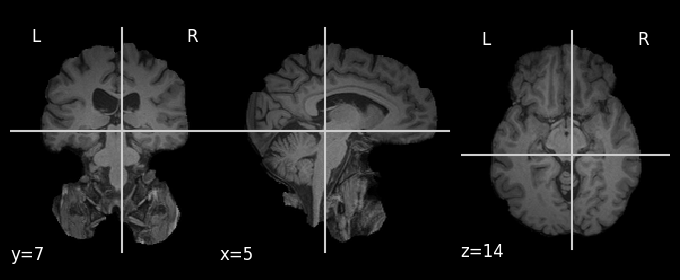

In [82]:
plot_anat("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/SCHIZO/images/selected/A00007409/A00007409-masked-T1w.nii.gz")

In [28]:
from dicom2nifti import convert_directory

test_fold = "/home/tbarba/projects/MultiModalBrainSurvival/data/MR/STANFORD/test"
fold = "/labs/gevaertlab/data/radiology/StanfordGBM/2018-03-05/GBM/Patient-01 - Patient-01/"
for folder in os.listdir(fold):
    seq = join(fold, folder)
    convert_directory(seq, test_fold)

In [76]:
from nilearn.image import resample_img, crop_img, resample_to_img

img = nib.load(
        "/home/tbarba/projects/MultiModalBrainSurvival/data/MR/STANFORD/test/400_ax_flair.nii.gz")
UKB = nib.load(join(ROOT, "data/MR/UKBIOBANK/images/1000739/1000739_T1.nii.gz"))
# UKB_AFFINE = nib.load(join(ROOT, "data/MR/UKBIOBANK/images/1000739/1000739_T1.nii.gz")).affine

img2 = resample_img(img, target_affine=UKB.affine)
img2 = crop_img(img2)
# print(img.shape)
print(img2.shape)



/labs/gevaertlab/users/thomas/miniconda/envs/crashtest/lib/python3.9/site-packages/nilearn/image/resampling.py:545: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


(220, 269, 251)


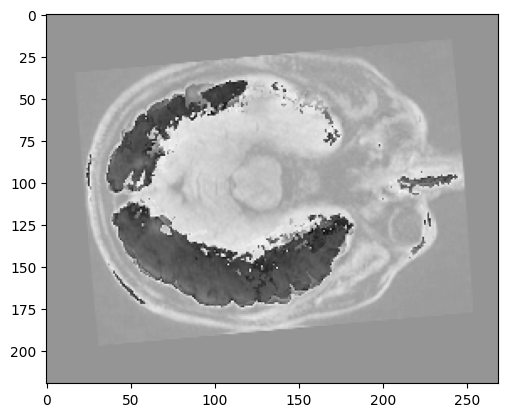

In [77]:
slice = img2.get_fdata()[:,:,100]
plt.imshow(slice, cmap="Greys_r")

In [32]:
for f in os.listdir("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/STANFORD/test"):
    if f.endswith("nii.gz"):
        img = nib.load(
        "/home/tbarba/projects/MultiModalBrainSurvival/data/MR/STANFORD/test/" + f)
        # print(img.shape)
        print(f, img.header.get_zooms())
    # slice = img.get_fdata()[:,:,100]

# print(img.shape)
# plt.imshow(slice, cmap="Greys_r")

402_cor_flair.nii.gz (0.5, 5.0, 0.5)
10_3d_asl_with_color.nii.gz (1.875, 1.875, 4.0, 1.0)
1_3plane_loc_ssfse.nii.gz (0.5859, 0.5859, 10.0, 1.0)
500_apparent_diffusion_coefficient_mm2s.nii.gz (0.9374995, 0.93750036, 4.9999924)
700_apparent_diffusion_coefficient_mm2s.nii.gz (0.9375002, 5.00001, 0.93750024)
13_ax_bravo_c.nii.gz (0.9375, 0.9375, 0.9999977)
5_ax_dwi_freq_rl.nii.gz (0.9374995, 0.93750036, 4.9999924, 1.0)
400_ax_flair.nii.gz (0.5, 0.5, 5.0)
9_ax_gre.nii.gz (0.46879995, 0.46880013, 5.0000105)
12_ax_t1_se__c.nii.gz (0.46879998, 0.46879995, 4.999987)
11_ax_t1_se_pre.nii.gz (0.46879998, 0.46879995, 4.999987)
8_ax_t2.nii.gz (0.46879998, 0.46879995, 4.999987)
1001_cerebral_blood_flow_color.nii.gz (0.9876544, 0.9876544, 4.0)
1301_cor_bravo_c.nii.gz (0.46875, 2.0, 0.46875)
7_cor_dwi.nii.gz (0.9375002, 5.00001, 0.93750024, 1.0)
501_exponential_apparent_diffusion_coefficient.nii.gz (0.9374995, 0.93750036, 4.9999924)
701_exponential_apparent_diffusion_coefficient.nii.gz (0.9375002, 5.00

In [189]:
UKB_AFFINE = nib.load(join(ROOT, "data/MR/UKBIOBANK/images/1000739/1000739_T1.nii.gz")).affine

extr2 = resample_img(img, target_affine=UKB_AFFINE)
# npl.plot_anat(extr2)

extr3 = nl.image.crop_img(extr2)
slice = extr3.get_fdata()[:,:,150]
plt.imshow(slice, cmap="Greys_r")

/labs/gevaertlab/users/thomas/miniconda/envs/crashtest/lib/python3.9/site-packages/nilearn/image/resampling.py:545: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


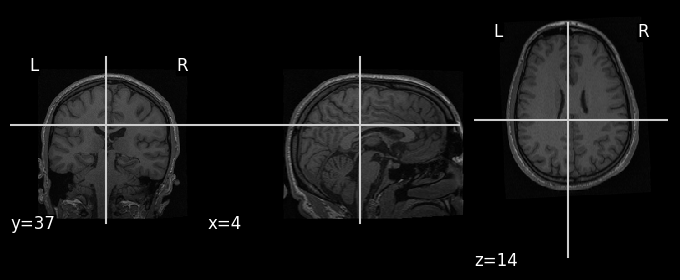

In [117]:
pa = nib.load(
    "/home/tbarba/projects/MultiModalBrainSurvival/data/MR/SCHIZO/images/test/T1MCICS.nii.gz")

# pa = nib.load("/home/tbarba/projects/MultiModalBrainSurvival/data/MR/UCSF/images/UCSF-PDGM-0004/UCSF-PDGM-0004_FLAIR.nii.gz")
pa2 = resample_img(pa, target_affine=toaff)
npl.plot_anat(pa2)
